In [2]:
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack
from astropy.time import Time
import numpy as np
import rafias_lib as rl
import pdb, glob, matplotlib, string
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] =  (10, 8)

## General

In [3]:
test_names = ['WLP8SUB','WLP8SUB640','FULLQ','FULL1', 'FULL2', 'FULL3', 'FULL4', 'FULL5', 'FULL6', 'FULL7', 'FULL9', 'FULL10',
              'FULL11', 'FULL12', 'FULL13', 'FULL14','FULL0', 'CLRSUB1', 'CLRSUB2', 'CLRSUB3', 'CLRSUB4', 'CLRSUB5', 'CLRSUB6',
              'WLP8SUBA1B4', 'WLP8SUBA2B3', 'WLP8SUBA3B2', 'WLP8SUBCHECK']

In [4]:
telem_table = ascii.read('/data1/tso_analysis/all_tso_cv3/temperatures/cv3_otp821_telem.CSV')
time_list = []
for time in telem_table['Secondary Time']:
    time_list.append(string.replace(string.replace(time, '/', '-'), ' ', 'T'))
Tlist = Time(time_list)
telem_table['JD'] = Tlist.jd
telem_table

Primary Time,Secondary Time,APID,Telemetry Mnemonic,EU Value,Flags,Raw Type,Raw Value,JD
str23,str23,int64,str23,str21,int64,str4,int64,float64
2016/01/11 00:00:00.000,2016/01/10 18:00:57.179,778,INRC_FA_TMC1_SW_HTR_ST,ENABLE,0,CS,1,2457398.25066
2016/01/11 00:00:00.000,2016/01/10 18:00:57.179,778,INRC_FA_TMC2_SW_HTR_ST,ENABLE,0,CS,1,2457398.25066
2016/01/11 00:00:00.000,2016/01/10 18:01:03.227,779,INRC_FB_TMC1_SW_HTR_ST,ENABLE,0,CS,1,2457398.25073
2016/01/11 00:00:00.000,2016/01/10 18:01:03.227,779,INRC_FB_TMC2_SW_HTR_ST,ENABLE,0,CS,1,2457398.25073
2016/01/11 00:00:00.000,2016/01/10 08:21:51.665,-1,IGDP_NRC_FA_TMC2_SWMV_T,9.054495271677895e+01,0,FL32,0,2457397.84851
2016/01/11 00:00:00.000,2016/01/07 20:31:56.977,-1,IGDP_NRC_FB_TMC2_SWMV_T,2.895544870499462e+02,0,FL32,0,2457395.35552
2016/01/11 00:00:00.000,2016/01/10 23:59:42.819,-1,IGDP_NRC_A_T_SWFPAH1,3.736645780735095e+01,5,FL32,0,2457398.4998
2016/01/11 00:00:00.000,2016/01/10 23:59:10.948,-1,IGDP_NRC_B_T_SWFPAH1,3.760912863591025e+01,5,FL32,0,2457398.49943
2016/01/11 00:00:00.000,2016/01/10 23:59:58.639,-1,IGDP_NRC_FA_TMC1_SWMV_T,3.720505137821176e+01,5,FL32,0,2457398.49998


In [5]:
tmnemonic = ['IGDP_NRC_A_T_SWFPAH1', 'IGDP_NRC_FA_TMC1_SWMV_T', 'IGDP_NRC_A_T_OBA_TS1', 'IGDP_NRC_FA_ACE1_SCTEMP',
             'IGDP_NRC_B_T_SWFPAH1', 'IGDP_NRC_FB_TMC1_SWMV_T', 'IGDP_NRC_B_T_OBA_TS1', 'IGDP_NRC_FB_ACE1_SCTEMP']
description = ['A Det Housing Temp', 'A Det Side Temp', 'Optical Bench Temp A', 'Asic Temp A',
               'B Det Housing Temp', 'B Det Side Temp', 'Optical Bench Temp B', 'Asic Temp B']
for n in ['a', 'b']:
    if n == 'a':
        for x, mnm in zip(range(1, 5), tmnemonic[:4]):
            globals()['index_'+n+'%s' % x] = np.where(telem_table['Telemetry Mnemonic'] == mnm)
    else:
        for x, mnm in zip(range(1, 5), tmnemonic[4:]):
            globals()['index_'+n+'%s' % x] = np.where(telem_table['Telemetry Mnemonic'] == mnm)

index_a1, index_a2, index_a3, index_a4, index_b1, index_b2, index_b3, index_b4

((array([     6,     53,    108, ..., 152321, 152371, 152398]),),
 (array([     8,     14,     15, ..., 152390, 152393, 152400]),),
 (array([], dtype=int64),),
 (array([    10,     32,    165, ..., 152262, 152389, 152404]),),
 (array([     7,     24,     80, ..., 152242, 152293, 152399]),),
 (array([     9,     12,     13, ..., 152391, 152392, 152402]),),
 (array([], dtype=int64),),
 (array([    11,    143,    272, ..., 152239, 152365, 152405]),))

In [6]:
x_data = []
y_data = []
for n in ['a', 'b']:
    for i in range(1,5):
        x_data.append(telem_table['JD'][globals()['index_'+n+'%s' % i]])
        y_data.append(telem_table['EU Value'][globals()['index_'+n+'%s' % i]])
len(x_data), len(y_data), len(x_data[0]), len(y_data[7])

(8, 8, 3594, 1199)

In [7]:
def closest_value(array, value):
    ind = (np.abs(array - value)).argmin()
    val = array[ind]
    return ind, val

In [8]:
def time_vars(hdu_filenames):
    "returns stime, etime, stime_ind, etime_ind"
    hdu = fits.open(hdu_filenames[1])
    header = hdu[0].header
    header

    stime_str = header['DATE-OBS']+'T'+header['TIME-OBS']
    etime_str = header['DATE-END']+'T'+header['TIME-END']
    stime = Time(stime_str).jd
    etime = Time(etime_str).jd
    stime_ind = []
    etime_ind = []
    for i in range(0,8):
        if len(x_data[i]) != 0:
            stime_ind.append(closest_value(x_data[i], stime)[0])
            etime_ind.append(closest_value(x_data[i], etime)[0])
        else:
            stime_ind.append(0)
            etime_ind.append(0)
    return stime, etime, stime_ind, etime_ind

In [9]:
def proper_lc(tvar, data):
    jd_time = data['Time']/86400
    x = jd_time + tvar[0]
    y = data['a1_b4_res_flux']
    #Light curve with A detector temperatures
    plt.subplot(2,1,1)
    rl.light_curve(x, y,style = 'r.-', lbl = 'Light curve')
    plt.xlabel('Time (JD)')
    plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
    plt.twinx()
    for i in range(0,4):
        x1 = x_data[i][tvar[2][i]:tvar[3][i]]
        y1 = (y_data[i][tvar[2][i]:tvar[3][i]]).astype(np.float)
        offset = np.median(y1)
        plt.ylabel('Differential Temperature(K)')
        plt.plot(x1, y1 - offset, label = '%s' % description[i])
    plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))
    #Light curve with B detector temperatures
    plt.subplot(2,1,2)
    rl.light_curve(x, y,style = 'r.-', lbl = 'Light curve')
    plt.xlabel('Time (JD)')
    plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
    plt.twinx()
    for i in range(4,8):
        x1 = x_data[i][tvar[2][i]:tvar[3][i]]
        y1 = (y_data[i][tvar[2][i]:tvar[3][i]]).astype(np.float)
        offset = np.median(y1)
        plt.ylabel('Differential Temperature(K)')
        plt.plot(x1, y1 - offset, label = '%s' % description[i])
    plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.85))

In [10]:
def averaged_norm_error(a1_data, b4_data, a1_files, b4_files):
    error_a1 = rl.norm_flux_error(a1_data[2:], 2.2, a1_files[2:])
    error_b4 = rl.norm_flux_error(b4_data[2:], 2.5, b4_files[2:])
    error_med = np.median(np.sqrt(np.square(error_a1) + np.square(error_b4))*0.5)
    return error_med

In [11]:
def rms_vs_bin(x, y, error, bin_size_low, bin_size_up, bin_size_inc, num_points, style, lbl = None):
    chop_size = 2
    x1 = x[chop_size:]
    y1 = y[chop_size:]
    y2 = rl.linear_bestfit(x1, y1, 0.00002, 1)
    
    stdev_array = []
    time_array = []
    bin_size_array = np.arange(bin_size_low, bin_size_up, bin_size_inc)
    for bin_size in bin_size_array:
        flux_array = []
        for bins in range(0, num_points-chop_size, bin_size):
            bin_start = bins
            bin_end   = bins + bin_size
            flux_in_one_bin = np.average(y2[bin_start:bin_end])
            flux_array.append(flux_in_one_bin)
        norm_flux_array = flux_array/np.median(y2[bin_start:bin_end])
        stdev_in_one_bin = np.std(norm_flux_array)
        stdev_array.append(stdev_in_one_bin*1e6)
        time_point = x1[bin_size] - x1[0]
        time_array.append(time_point)
#         pdb.set_trace()

    i_scale = stdev_array[0]/np.sqrt(bin_size_array)
    i_noise = (error*1e6)/np.sqrt(bin_size_array)
    plt.loglog(time_array,stdev_array, style, label = lbl)
    plt.loglog(time_array, i_scale, 'k--', label = 'Ideal scaling')
    plt.loglog(time_array, i_noise, 'g--', label = 'Ideal noise')
    plt.xlabel('Bin size (seconds)')
    plt.ylabel('$\sigma$ (ppm)')

## Test 1 (WLP8SUB)

In [12]:
hdu_filenames_a11 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'+
                              '/NRCN821WLP8SUB-6012134600_1_481_SE_2016-01-12T16h42m53/*.slp.fits')
len(hdu_filenames_a11)

306

In [13]:
hdu_filenames_b41 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'+
                              '/NRCN821WLP8SUB-6012134957_1_489_SE_2016-01-12T16h43m29/*.slp.fits')[:306]
len(hdu_filenames_b41)

306

In [14]:
centers_a11 = rl.gen_center_g2d(166,160,5,400,2,2,0,hdu_filenames_a11,red = False)[0]
centers_b41 = rl.gen_center_g2d(162,156,5,500,2,2,0,hdu_filenames_b41,red = False)[0]
data1 = rl.average_residual_flux(centers_a11, centers_b41, 70, 72, 80, hdu_filenames_a11,
                                 hdu_filenames_b41, red = False)

In [15]:
tvar1 = time_vars(hdu_filenames_a11)
tvar1

(2457400.0791508215,
 2457400.15841375,
 [1885, 36738, 0, 628, 1740, 37223, 0, 645],
 [1980, 36825, 0, 649, 1828, 37309, 0, 666])

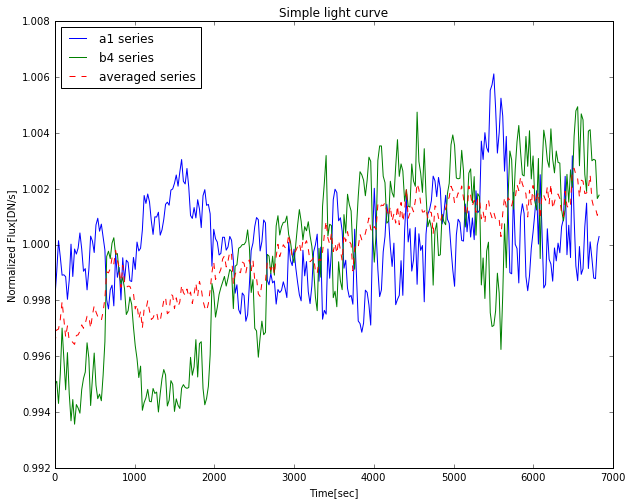

In [16]:
rl.light_curve(data1['Time'], data1['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data1['Time'], data1['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data1['Time'], data1['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

/home/rafia/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/rafia/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


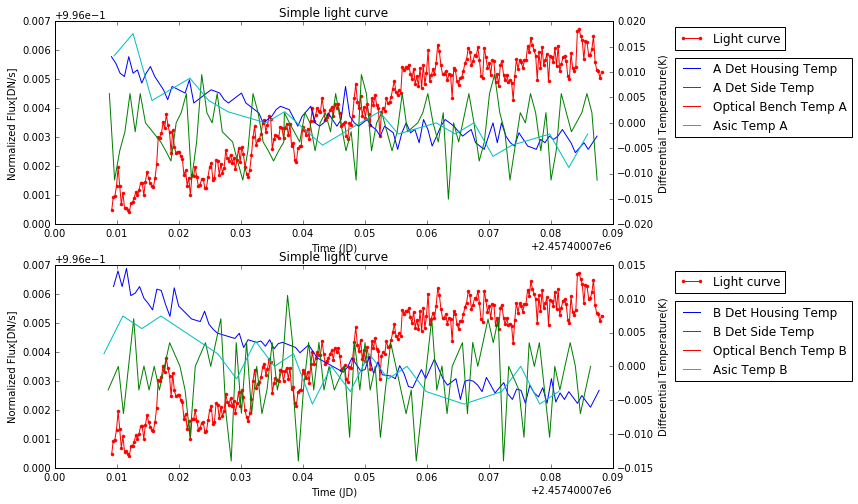

In [17]:
proper_lc(tvar1, data1)

## Test 2 (WLP8SUB640)

In [18]:
hdu_filenames_a12 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8SUB640-6012195832_1_481_SE_2016-01-12T20h57m57/*.slp.fits')
len(hdu_filenames_a12)

60

In [19]:
hdu_filenames_b42 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8SUB640-6012200140_1_489_SE_2016-01-12T20h58m27/*.slp.fits')
len(hdu_filenames_b42)

60

In [20]:
centers_a12 = rl.gen_center_g2d(326,320,5,400,2,2,0,hdu_filenames_a12, red = False)[0]
centers_b42 = rl.gen_center_g2d(319,316,5,500,2,2,0,hdu_filenames_b42, red = False)[0]
data2 = rl.average_residual_flux(centers_a12, centers_b42, 70, 72, 80, hdu_filenames_a12,
                                 hdu_filenames_b42, red = False)

In [21]:
tvar2 = time_vars(hdu_filenames_a12)
tvar2

(2457400.3369879746,
 2457400.3573041204,
 [2197, 38260, 0, 700, 2027, 38741, 0, 719],
 [2221, 38282, 0, 706, 2050, 38766, 0, 725])

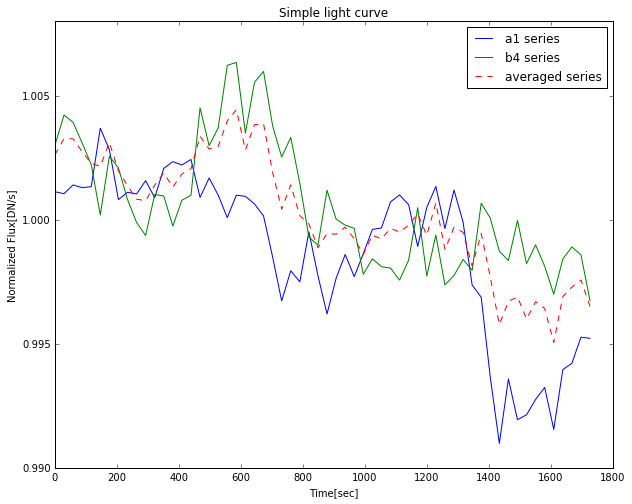

In [22]:
rl.light_curve(data2['Time'], data2['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data2['Time'], data2['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data2['Time'], data2['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

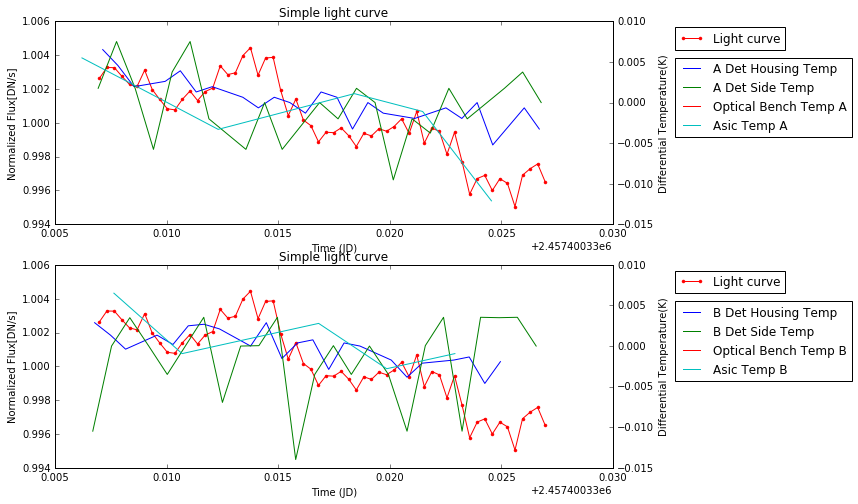

In [23]:
proper_lc(tvar2, data2)

## Test 3 (FULLQ)

In [24]:
hdu_filenames_a13 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULLQ-6013001651_1_481_SE_2016-01-13T01h03m43/*.red.fits')
len(hdu_filenames_a13)

55

In [25]:
hdu_filenames_b43 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULLQ-6013002009_1_489_SE_2016-01-13T01h03m23/*.red.fits')
len(hdu_filenames_b43)

55

In [26]:
centers_a13 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a13, red = True)[0]
centers_b43 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b43, red = True)[0]
data3 = rl.average_residual_flux(centers_a13, centers_b43, 70, 72, 80, 
                                 hdu_filenames_a13, hdu_filenames_b43, red = True)

In [27]:
tvar3 = time_vars(hdu_filenames_a13)
tvar3

(2457400.518157662,
 2457400.538661898,
 [2421, 38733, 0, 756, 2226, 39224, 0, 765],
 [2446, 38756, 0, 759, 2246, 39245, 0, 772])

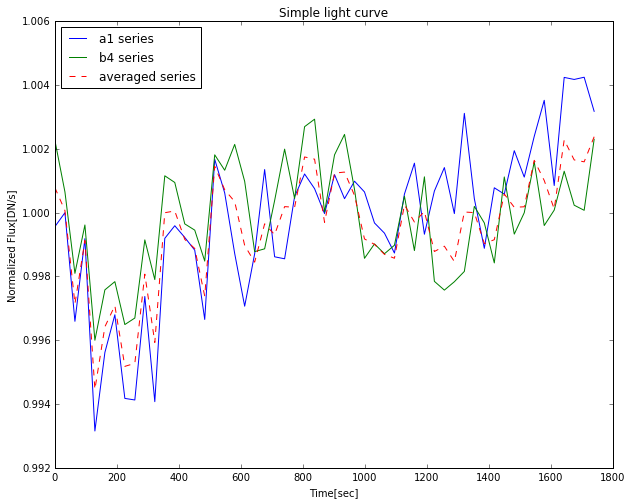

In [28]:
rl.light_curve(data3['Time'], data3['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data3['Time'], data3['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data3['Time'], data3['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

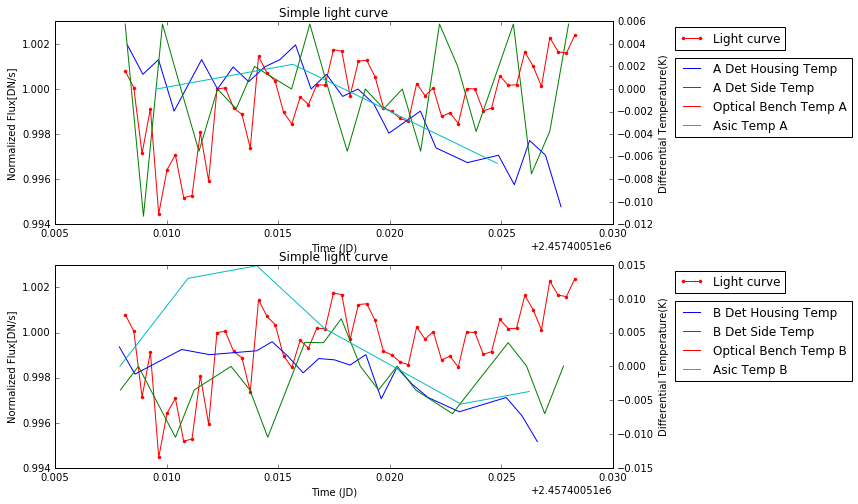

In [29]:
proper_lc(tvar3, data3)

## Test 4 (FULL1)

In [30]:
hdu_filenames_a14 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL1-6012051326_1_481_SE_2016-01-12T08h55m24/*.red.fits')
len(hdu_filenames_a14)

225

In [31]:
hdu_filenames_b44 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL1-6012051528_1_489_SE_2016-01-12T08h30m07/*.red.fits')
len(hdu_filenames_b44)

225

In [32]:
centers_a14 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a14, red = True)[0]
centers_b44 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b44, red = True)[0]
data4 = rl.average_residual_flux(centers_a14, centers_b44, 70, 72, 80, 
                                 hdu_filenames_a14, hdu_filenames_b44, red = True)

In [33]:
tvar4 = time_vars(hdu_filenames_a14)
tvar4

(2457399.720659479,
 2457399.8045404167,
 [1472, 36275, 0, 540, 1342, 36780, 0, 548],
 [1571, 36364, 0, 557, 1435, 36861, 0, 569])

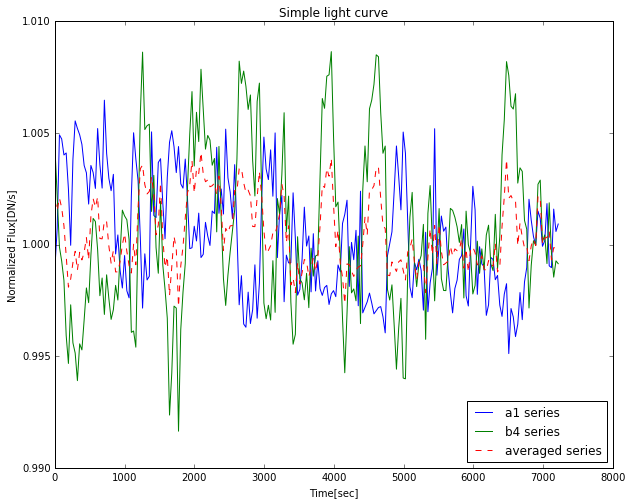

In [34]:
rl.light_curve(data4['Time'], data4['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data4['Time'], data4['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data4['Time'], data4['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

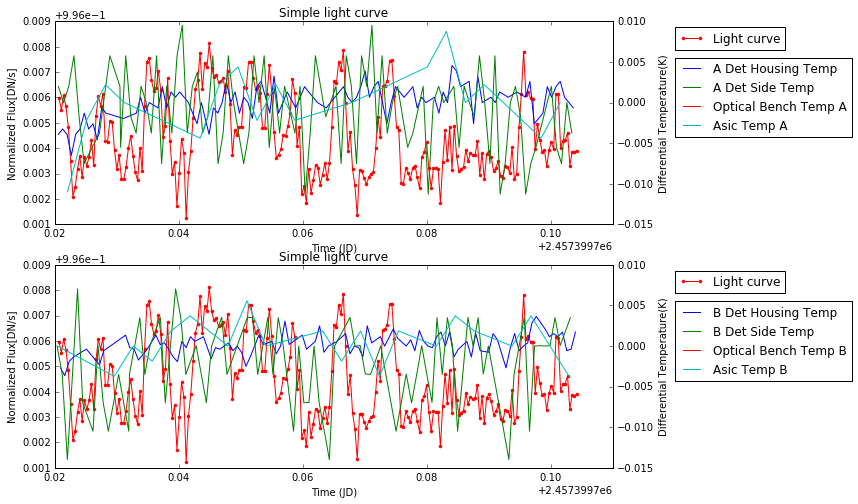

In [35]:
proper_lc(tvar4, data4)

## Test 5 (FULL2)

In [36]:
hdu_filenames_a15 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL2-6012072417_1_481_SE_2016-01-12T10h40m58/*.red.fits')
len(hdu_filenames_a15)

225

In [37]:
hdu_filenames_b45 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL2-6012072532_1_489_SE_2016-01-12T11h09m06/*.red.fits')
len(hdu_filenames_b45)

225

In [38]:
centers_a15 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a15, red = True)[0]
centers_b45 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b45, red = True)[0]
data5 = rl.average_residual_flux(centers_a15, centers_b45, 70, 72, 80, 
                                 hdu_filenames_a15, hdu_filenames_b45, red = True)

In [39]:
tvar5 = time_vars(hdu_filenames_a15)
tvar5

(2457399.810380961,
 2457399.894261898,
 [1578, 36389, 0, 560, 1442, 36886, 0, 570],
 [1672, 36475, 0, 579, 1539, 36973, 0, 593])

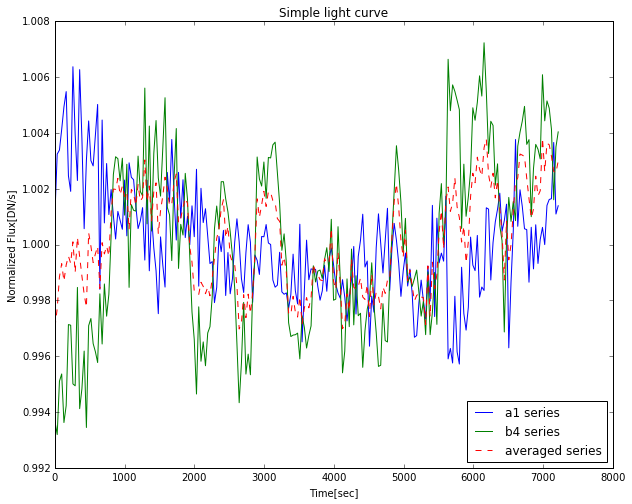

In [40]:
rl.light_curve(data5['Time'], data5['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data5['Time'], data5['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data5['Time'], data5['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

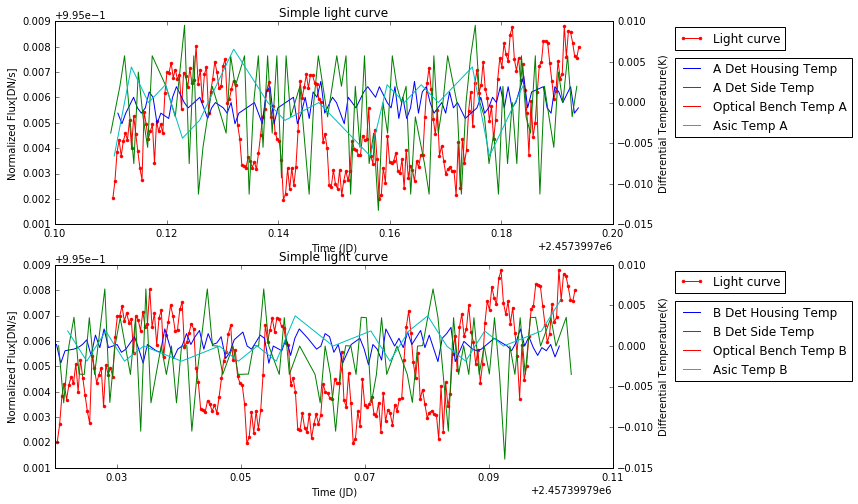

In [41]:
proper_lc(tvar5, data5)

## Test 6 (FULL3)

In [42]:
hdu_filenames_a16 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL3-6012093326_1_481_SE_2016-01-12T12h47m44/*.red.fits')
len(hdu_filenames_a16)

225

In [43]:
hdu_filenames_b46 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL3-6012093432_1_489_SE_2016-01-12T12h52m21/*.red.fits')
len(hdu_filenames_b46)

225

In [44]:
centers_a16 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a16, red = True)[0]
centers_b46 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b46, red = True)[0]
data6 = rl.average_residual_flux(centers_a16, centers_b46, 70, 72, 80, 
                                 hdu_filenames_a16, hdu_filenames_b46, red = True)

In [45]:
tvar6 = time_vars(hdu_filenames_a16)
tvar6

(2457399.900102442,
 2457399.98398338,
 [1676, 36499, 0, 581, 1547, 36997, 0, 595],
 [1773, 36590, 0, 603, 1636, 37080, 0, 616])

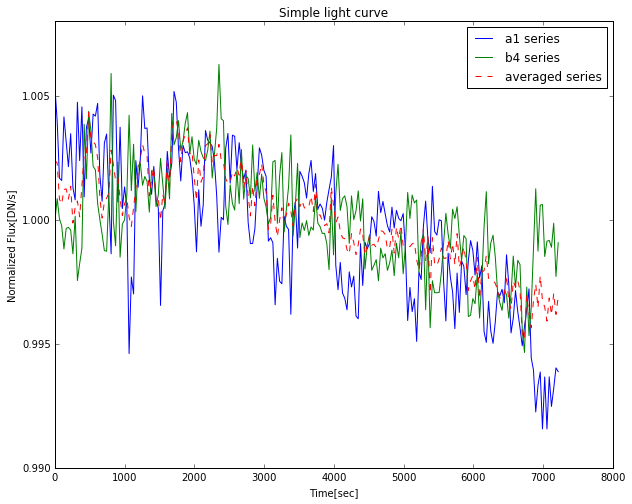

In [46]:
rl.light_curve(data6['Time'], data6['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data6['Time'], data6['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data6['Time'], data6['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

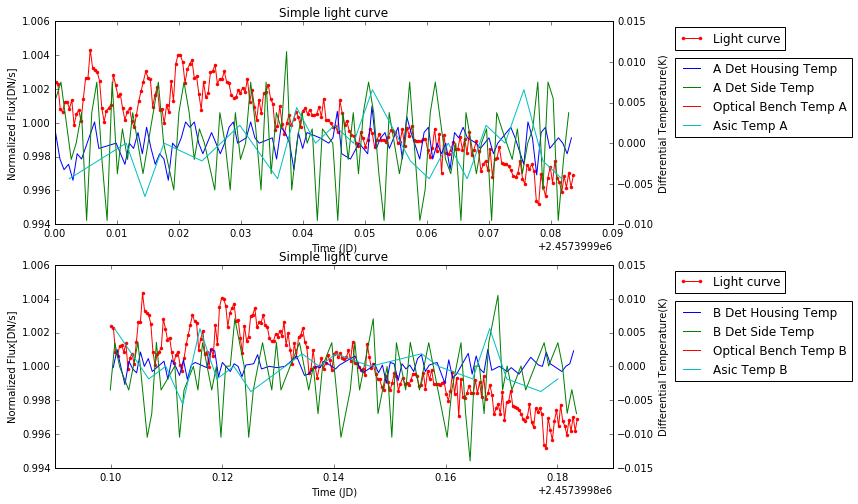

In [47]:
proper_lc(tvar6, data6)

## Test 7 (FULL4)

In [48]:
hdu_filenames_a17 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL4-6012114105_1_481_SE_2016-01-12T14h25m53/*.red.fits')
len(hdu_filenames_a17)

225

In [49]:
hdu_filenames_b47 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL4-6012114212_1_489_SE_2016-01-12T14h58m10/*.red.fits')
len(hdu_filenames_b47)

225

In [50]:
centers_a17 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a17, red = True)[0]
centers_b47 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b47, red = True)[0]
data7 = rl.average_residual_flux(centers_a17, centers_b47, 70, 72, 80, 
                                 hdu_filenames_a17, hdu_filenames_b47, red = True)

In [51]:
tvar7 = time_vars(hdu_filenames_a17)
tvar7

(2457399.988705405,
 2457400.0725863427,
 [1779, 36619, 0, 604, 1641, 37103, 0, 618],
 [1878, 36707, 0, 626, 1734, 37195, 0, 642])

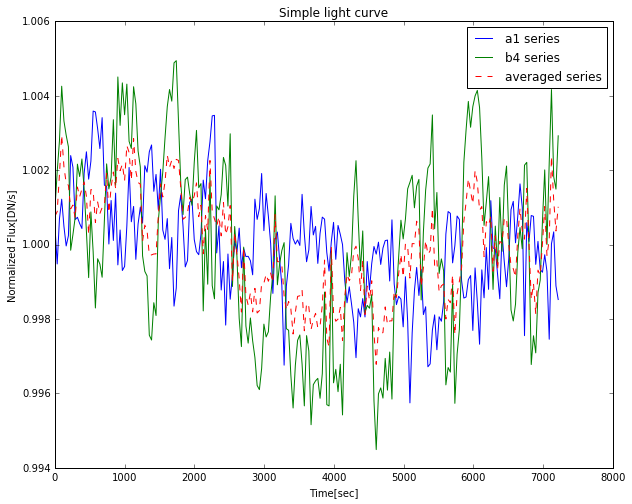

In [52]:
rl.light_curve(data7['Time'], data7['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data7['Time'], data7['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data7['Time'], data7['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

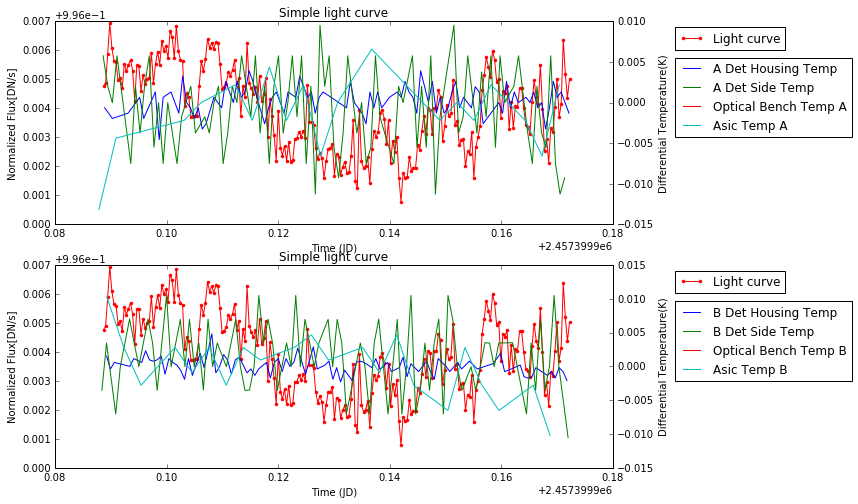

In [53]:
proper_lc(tvar7, data7)

## Test 8 (FULL5)

In [54]:
hdu_filenames_a18 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL5-6012184421_1_481_SE_2016-01-12T20h26m57/*.red.fits')
len(hdu_filenames_a18)

110

In [55]:
hdu_filenames_b48 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL5-6012185018_1_489_SE_2016-01-12T20h20m15/*.red.fits')
len(hdu_filenames_b48)

110

In [56]:
centers_a18 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a18, red = True)[0]
centers_b48 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b48, red = True)[0]
data8 = rl.average_residual_flux(centers_a18, centers_b48, 70, 72, 80, 
                                 hdu_filenames_a18, hdu_filenames_b48, red = True)

In [57]:
tvar8 = time_vars(hdu_filenames_a18)
tvar8

(2457400.2873786227,
 2457400.3283870835,
 [2139, 38184, 0, 685, 1968, 38668, 0, 705],
 [2187, 38226, 0, 697, 2017, 38711, 0, 716])

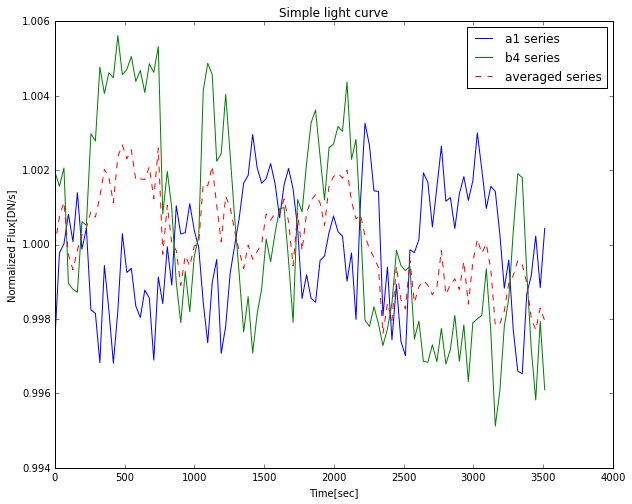

In [58]:
rl.light_curve(data8['Time'], data8['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data8['Time'], data8['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data8['Time'], data8['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

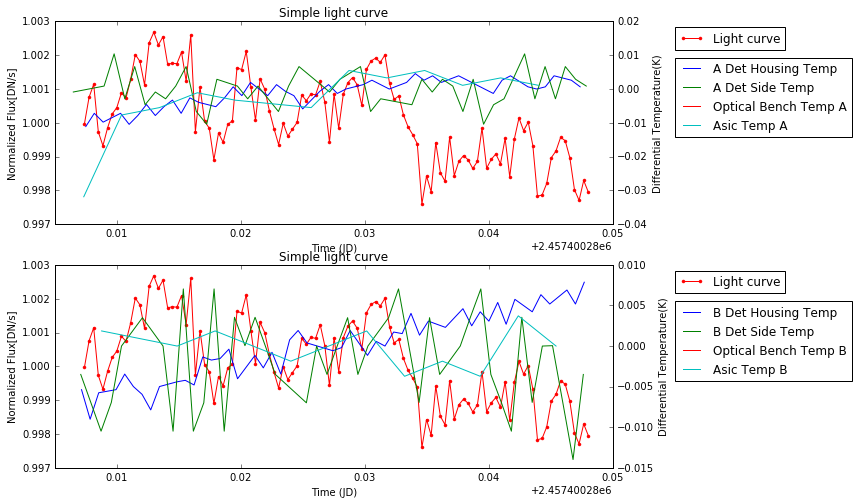

In [59]:
proper_lc(tvar8, data8)

## Test 9 (FULL6)

In [60]:
hdu_filenames_a19 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL6-6012204238_1_481_SE_2016-01-12T21h31m48/*.red.fits')
len(hdu_filenames_a19)

55

In [61]:
hdu_filenames_b49 = glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL6-6012204544_1_489_SE_2016-01-12T21h31m58/*.red.fits')
len(hdu_filenames_b49)

55

In [62]:
centers_a19 = rl.gen_center_g2d(1405,1036,5,400,4,4,0,hdu_filenames_a19, red = True)[0]
centers_b49 = rl.gen_center_g2d(828,821,5,600,4,4,0,hdu_filenames_b49, red = True)[0]
data9 = rl.average_residual_flux(centers_a19, centers_b49, 70, 72, 80, 
                                 hdu_filenames_a19, hdu_filenames_b49, red = True)

In [63]:
tvar9 = time_vars(hdu_filenames_a19)
tvar9

(2457400.367544329,
 2457400.388048565,
 [2235, 38313, 0, 710, 2065, 38798, 0, 727],
 [2260, 38335, 0, 717, 2088, 38820, 0, 732])

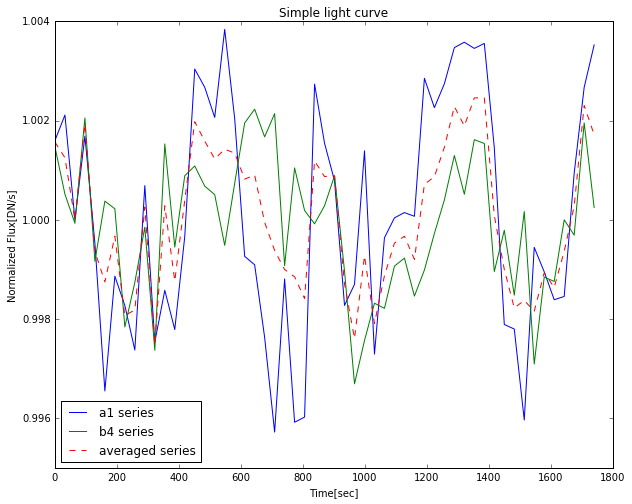

In [64]:
rl.light_curve(data9['Time'], data9['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data9['Time'], data9['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data9['Time'], data9['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

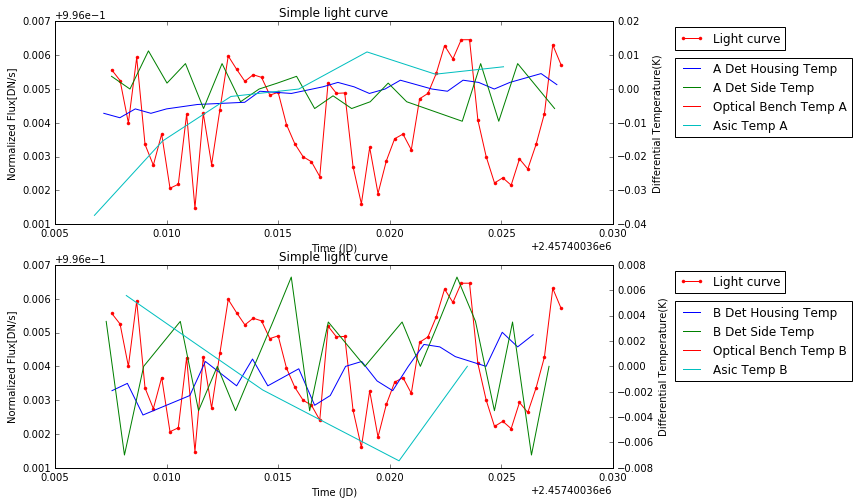

In [65]:
proper_lc(tvar9, data9)

## Test 10 (FULL7)

In [66]:
hdu_filenames_a110 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL7-*_481_SE_*/*.red.fits'))
len(hdu_filenames_a110)

20

In [67]:
hdu_filenames_b410 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL7-*_489_SE_*/*.red.fits'))
len(hdu_filenames_b410)

20

In [68]:
centers_a110 = rl.gen_center_g2d(1607,1036,5,4000,4,4,0,hdu_filenames_a110, red = True)[0]
centers_b410 = rl.gen_center_g2d(1029,835,5,4500,4,4,0,hdu_filenames_b410, red = True)[0]
data10 = rl.average_residual_flux(centers_a110, centers_b410, 70, 72, 80, 
                                 hdu_filenames_a110, hdu_filenames_b410, red = True)

In [69]:
tvar10 = time_vars(hdu_filenames_a110)
tvar10

(2457400.3923984026,
 2457400.3998544794,
 [2264, 38365, 0, 718, 2093, 38847, 0, 734],
 [2274, 38374, 0, 720, 2100, 38856, 0, 736])

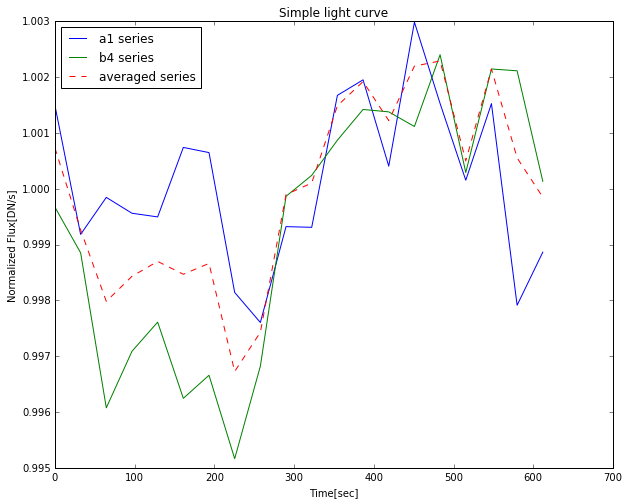

In [70]:
rl.light_curve(data10['Time'], data10['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data10['Time'], data10['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data10['Time'], data10['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

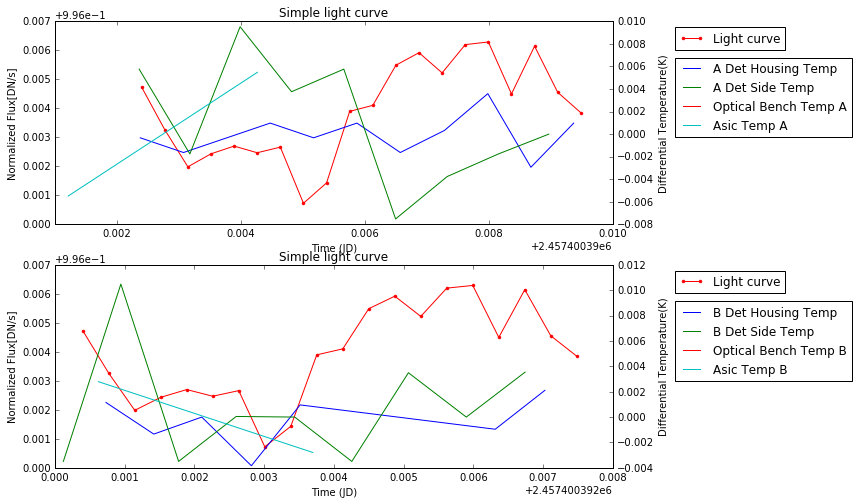

In [71]:
proper_lc(tvar10, data10)

## Test 11 (FULL9)

In [72]:
hdu_filenames_a111 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL9-*_481_SE_*/*.red.fits'))
len(hdu_filenames_a111)

20

In [73]:
hdu_filenames_b411 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL9-*_489_SE_*/*.red.fits'))
len(hdu_filenames_b411)

20

In [74]:
centers_a111 = rl.gen_center_g2d(1407,1236,5,4000,4,4,0,hdu_filenames_a111, red = True)[0]
centers_b411 = rl.gen_center_g2d(830,1019,5,4500,4,4,0,hdu_filenames_b411, red = True)[0]
data11 = rl.average_residual_flux(centers_a111, centers_b411, 70, 72, 80, 
                                 hdu_filenames_a111, hdu_filenames_b411, red = True)

In [75]:
tvar11 = time_vars(hdu_filenames_a111)
tvar11

(2457400.4129021065,
 2457400.4203581945,
 [2290, 38430, 0, 723, 2112, 38913, 0, 738],
 [2299, 38438, 0, 726, 2123, 38922, 0, 740])

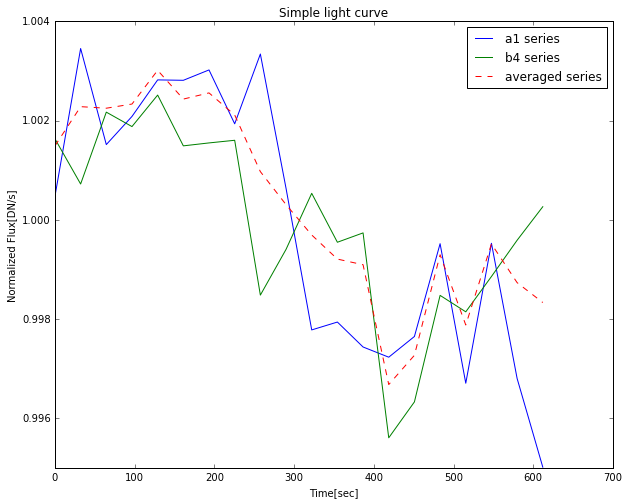

In [76]:
rl.light_curve(data11['Time'], data11['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data11['Time'], data11['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data11['Time'], data11['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

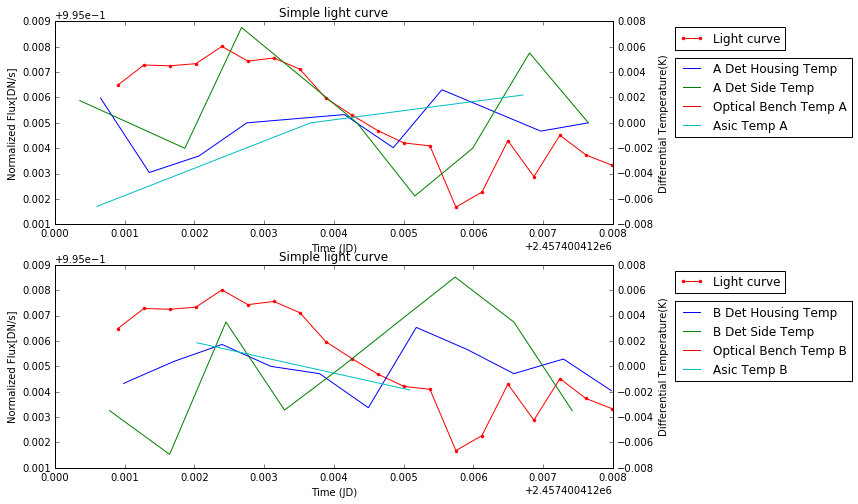

In [77]:
proper_lc(tvar11, data11)

## Test 12 (FULL10)

In [78]:
hdu_filenames_a112 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL10-*_481_SE_*/*.red.fits'))
len(hdu_filenames_a112)

20

In [79]:
hdu_filenames_b412 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL10-*_489_SE_*/*.red.fits'))
len(hdu_filenames_b412)

20

In [80]:
centers_a112 = rl.gen_center_g2d(1808,1237,5,4000,4,4,0,hdu_filenames_a112, red = True)[0]
centers_b412 = rl.gen_center_g2d(1227,1052,5,5000,4,4,0,hdu_filenames_b412, red = True)[0]
data12 = rl.average_residual_flux(centers_a112, centers_b412, 70, 72, 80, 
                                 hdu_filenames_a112, hdu_filenames_b412, red = True)

In [81]:
tvar12 = time_vars(hdu_filenames_a112)
tvar12

(2457400.423092477,
 2457400.430548565,
 [2302, 38462, 0, 727, 2125, 38946, 0, 740],
 [2313, 38470, 0, 729, 2134, 38954, 0, 742])

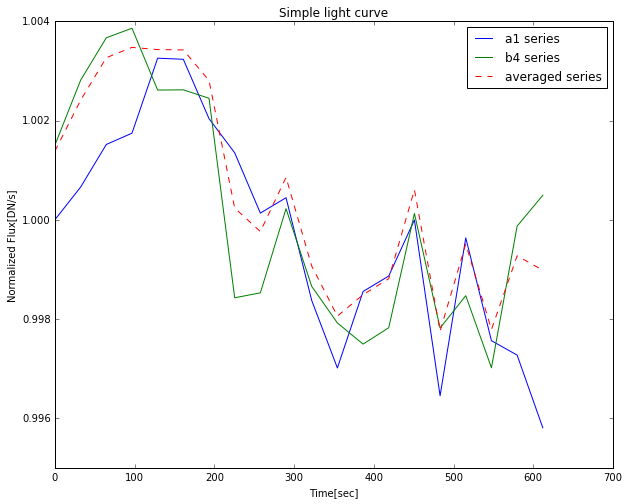

In [82]:
rl.light_curve(data12['Time'], data12['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data12['Time'], data12['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data12['Time'], data12['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

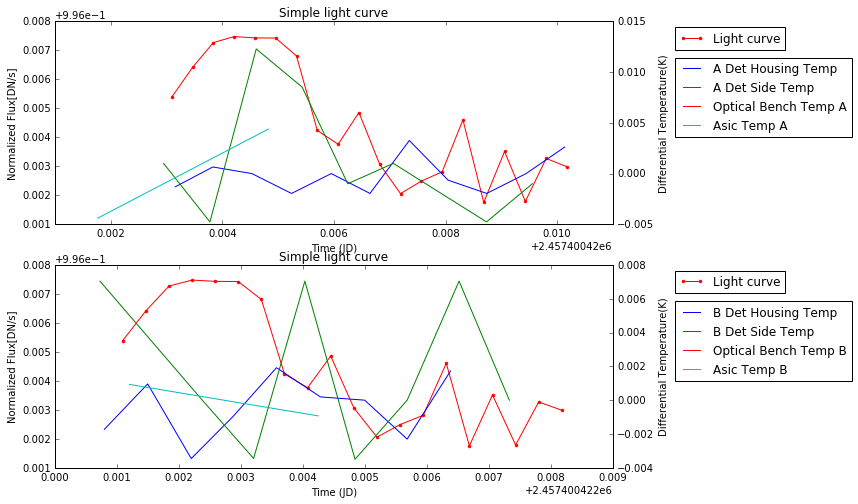

In [83]:
proper_lc(tvar12, data12)

## Test 13 (FULL11)

In [84]:
hdu_filenames_a113 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL11-*_481_SE_*/*.red.fits'))
len(hdu_filenames_a113)

20

In [85]:
hdu_filenames_b413 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL11-*_489_SE_*/*.red.fits'))
len(hdu_filenames_b413)

20

In [86]:
centers_a113 = rl.gen_center_g2d(1808,1037,5,4000,4,4,0,hdu_filenames_a113, red = True)[0]
centers_b413 = rl.gen_center_g2d(1228,851,5,4500,4,4,0,hdu_filenames_b413, red = True)[0]
data13 = rl.average_residual_flux(centers_a113, centers_b413, 70, 72, 80, 
                                 hdu_filenames_a113, hdu_filenames_b413, red = True)

In [87]:
tvar13 = time_vars(hdu_filenames_a113)
tvar13

(2457400.433282847,
 2457400.440738935,
 [2316, 38498, 0, 730, 2137, 38980, 0, 743],
 [2324, 38503, 0, 732, 2145, 38988, 0, 745])

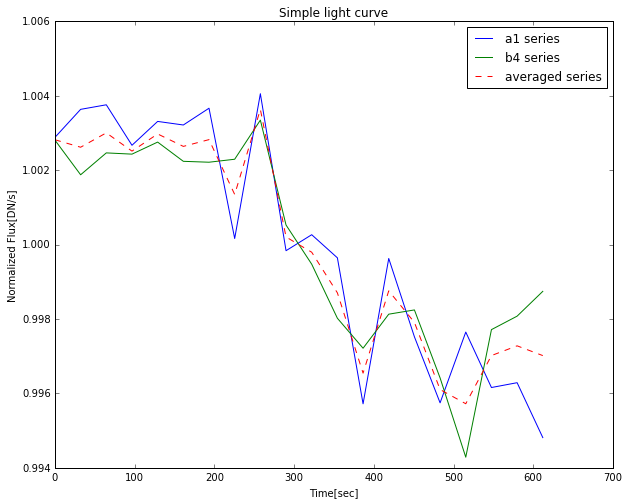

In [88]:
rl.light_curve(data13['Time'], data13['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data13['Time'], data13['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data13['Time'], data13['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

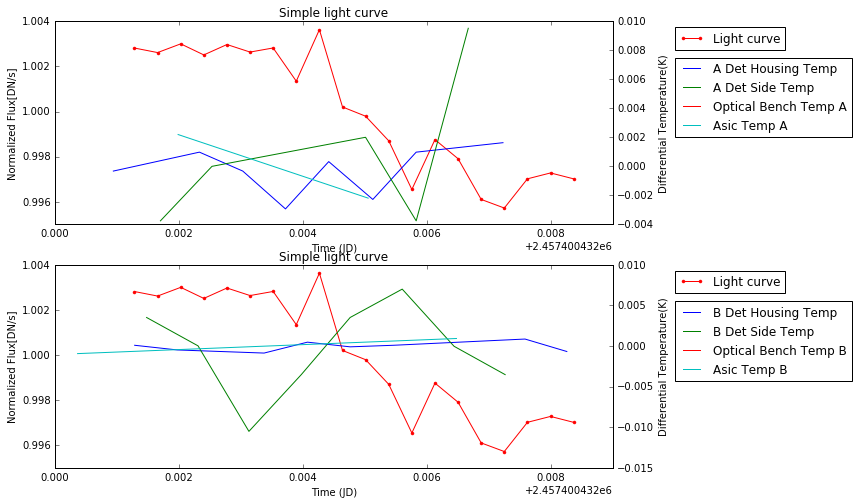

In [89]:
proper_lc(tvar13, data13)

## Test 14 (FULL12)

In [90]:
hdu_filenames_a114 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL12-*_481_SE_*/*.red.fits'))
len(hdu_filenames_a114)

20

In [91]:
hdu_filenames_b414 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL12-*_489_SE_*/*.red.fits'))
len(hdu_filenames_b414)

20

In [92]:
centers_a114 = rl.gen_center_g2d(1808,838,5,4000,4,4,0,hdu_filenames_a114, red = True)[0]
centers_b414 = rl.gen_center_g2d(1228,653,5,6500,4,4,0,hdu_filenames_b414, red = True)[0]
data14 = rl.average_residual_flux(centers_a114, centers_b414, 70, 72, 80, 
                                 hdu_filenames_a114, hdu_filenames_b414, red = True)

In [93]:
tvar14 = time_vars(hdu_filenames_a114)
tvar14

(2457400.4434724767,
 2457400.4509285646,
 [2327, 38531, 0, 733, 2148, 39009, 0, 746],
 [2337, 38539, 0, 735, 2157, 39017, 0, 748])

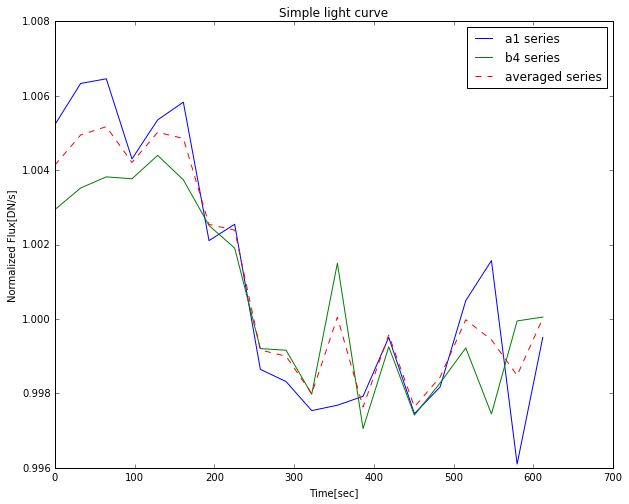

In [94]:
rl.light_curve(data14['Time'], data14['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data14['Time'], data14['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data14['Time'], data14['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

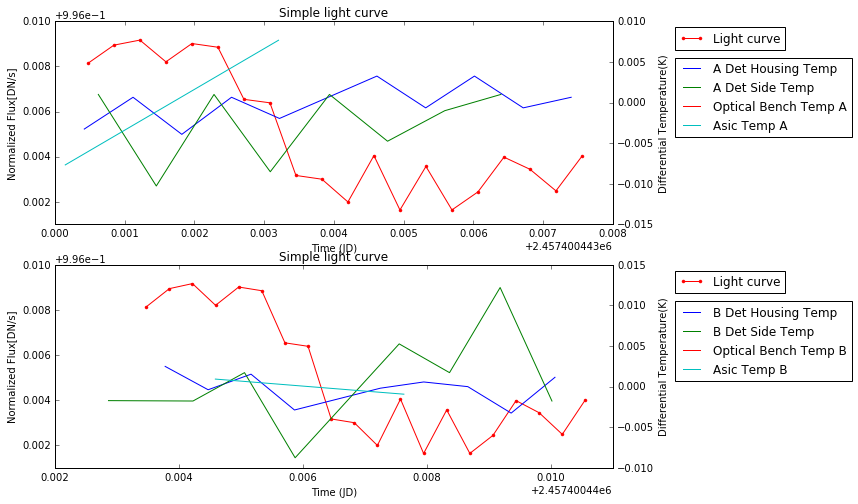

In [95]:
proper_lc(tvar14, data14)

## Test 15 (FULL13)

In [96]:
hdu_filenames_a115 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL13-*_481_SE_*/*.red.fits'))
len(hdu_filenames_a115)

20

In [97]:
hdu_filenames_b415 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_PPP'
                              '/NRCN821WLP8FULL13-*_489_SE_*/*.red.fits'))
len(hdu_filenames_b415)

20

In [98]:
centers_a115 = rl.gen_center_g2d(1407,838,5,4000,4,4,0,hdu_filenames_a115, red = True)[0]
centers_b415 = rl.gen_center_g2d(831,623,5,6500,4,4,0,hdu_filenames_b415, red = True)[0]
data15 = rl.average_residual_flux(centers_a115, centers_b415, 70, 72, 80, 
                                 hdu_filenames_a115, hdu_filenames_b415, red = True)

In [99]:
tvar15 = time_vars(hdu_filenames_a115)
tvar15

(2457400.453786551,
 2457400.461242639,
 [2341, 38564, 0, 735, 2161, 39044, 0, 749],
 [2349, 38572, 0, 738, 2168, 39052, 0, 751])

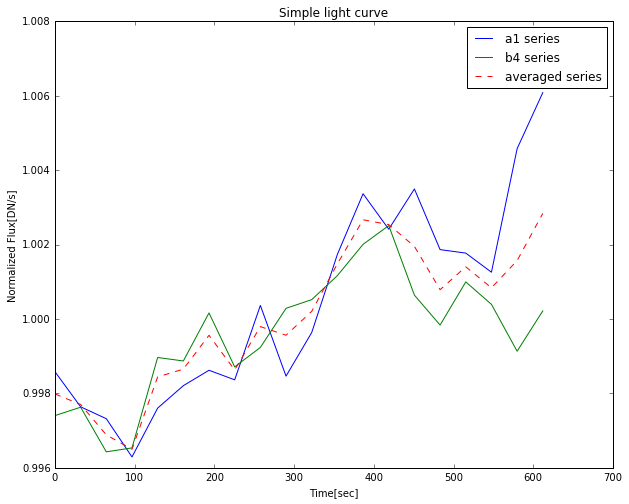

In [100]:
rl.light_curve(data15['Time'], data15['a1_res_flux'], style = 'b-', lbl = 'a1 series')
rl.light_curve(data15['Time'], data15['b4_res_flux'], style = 'g-', lbl = 'b4 series')
rl.light_curve(data15['Time'], data15['a1_b4_res_flux'], style = 'r--', lbl = 'averaged series')
plt.legend(loc = 'best')

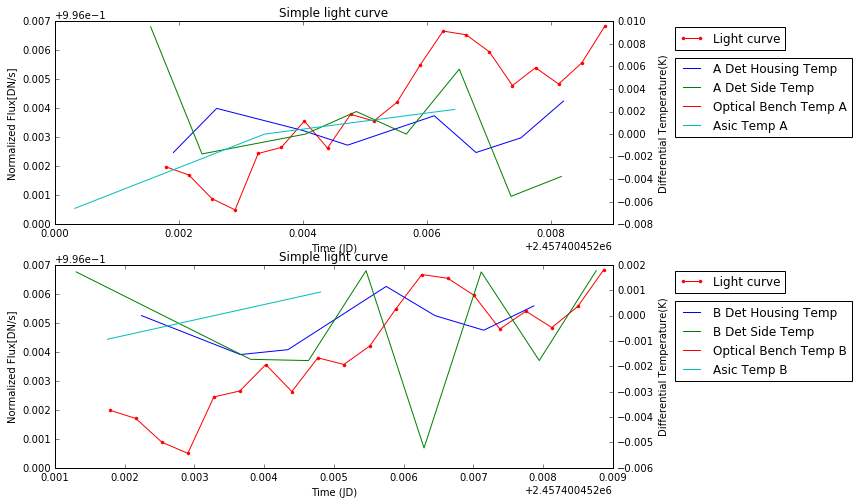

In [101]:
proper_lc(tvar15, data15)

## Test 16 (FULL14)

## Test 18 (CLRSUB1)

## Test 24 (WLP8A1B4)

## Stitching plots together

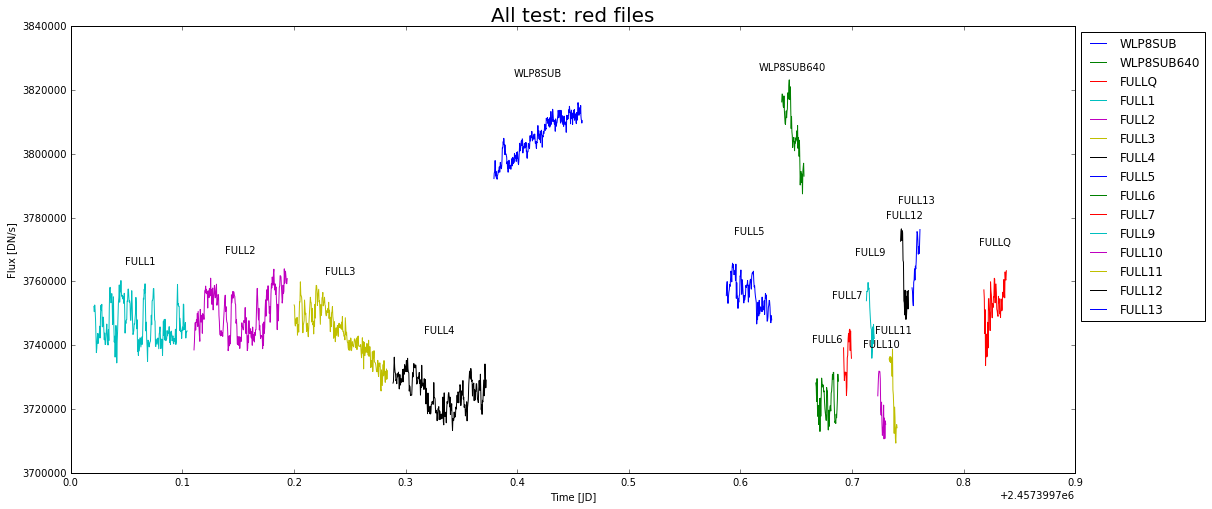

In [103]:
# Everything except CLRSUB
plt.rcParams['figure.figsize'] = (18.0, 8.0)
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in a:
    x = globals()['data%s' % i]['Time']/86400 + globals()['tvar%s' % i][0]
    y = globals()['data%s' % i]['a1_b4_res_flux']
    plt.plot(x, y, label = '%s' % test_names[i-1])
    plt.text(np.mean(x),np.mean(y*1.005),'%s' % test_names[i-1], horizontalalignment = 'center')
    plt.xlabel('Time [JD]')
    plt.ylabel('Flux [DN/s]')
    plt.title('All test: red files', fontsize = 20)
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.savefig('plot_PPP.pdf')